In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Exploratory Data Analysis

In [4]:
df.shape

(14999, 10)

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df.groupby('Department').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [9]:
df.groupby('salary').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [10]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Data Cleaning

In [11]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
df.drop_duplicates(inplace=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [13]:
df.groupby('salary').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.643343,0.706838,3.791919,200.067677,3.493939,0.157576,0.048485,0.044444
low,0.622655,0.718512,3.801742,200.439199,3.319686,0.154878,0.204530,0.006620
medium,0.634723,0.716539,3.806121,200.587341,3.389850,0.153013,0.146170,0.022999


In [14]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


# Data Visualization

Text(0.5, 9.444444444444438, 'Employee churn')

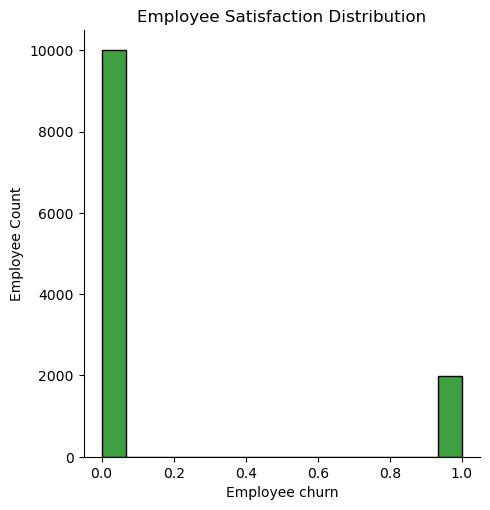

In [15]:
sns.displot(df.left, color="g")
plt.title('Employee Satisfaction Distribution')
plt.ylabel('Employee Count')
plt.xlabel('Employee churn')

Text(0.5, 1.0, 'Employee Churn Distribution')

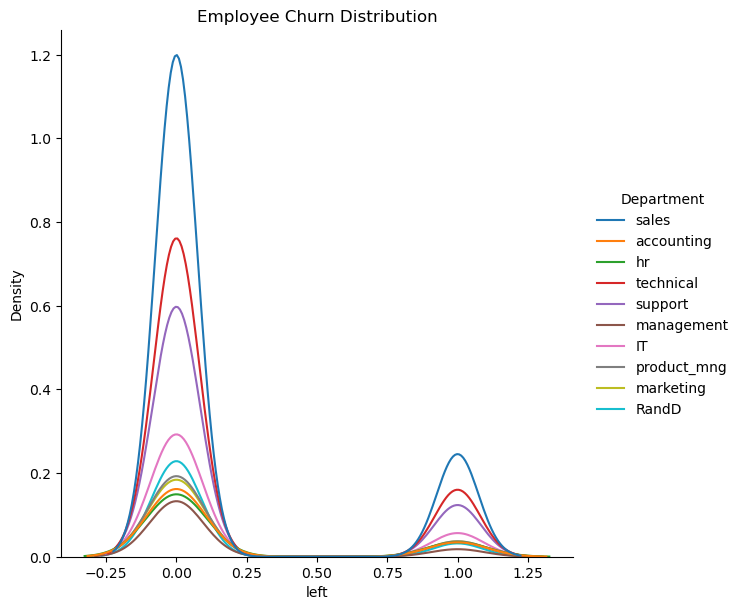

In [16]:
sns.displot(df, x='left', color="g", kind='kde', hue='Department',height=6)
plt.title('Employee Churn Distribution')

Text(0.5, 1.0, 'Employee Evaluation Distribution')

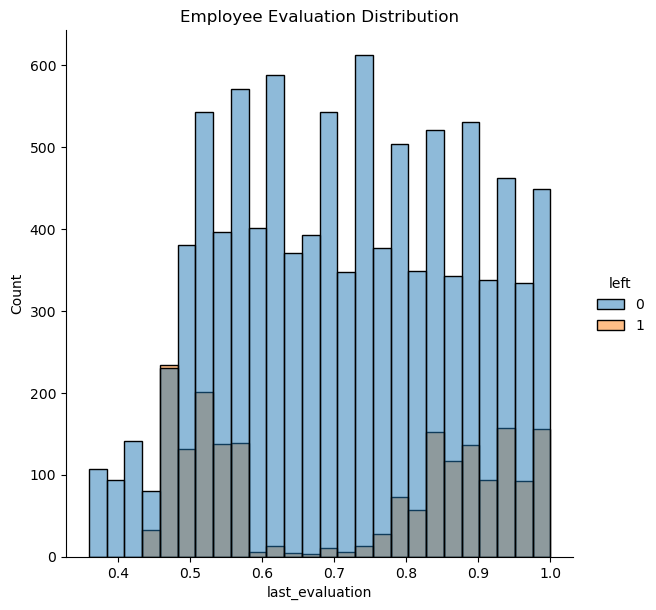

In [17]:
sns.displot(df, x='last_evaluation', kde=False, hue='left',height=6)
plt.title('Employee Evaluation Distribution')

Text(0.5, 1.0, 'Average Montly Hours Distribution')

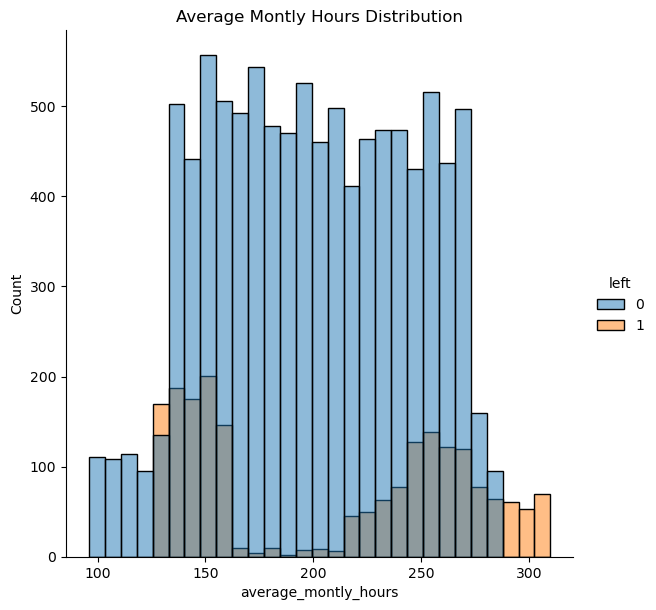

In [18]:
sns.displot(df, x='average_montly_hours', hue='left',height=6)
plt.title('Average Montly Hours Distribution')

Text(0.5, 1.0, 'Salary Distribution')

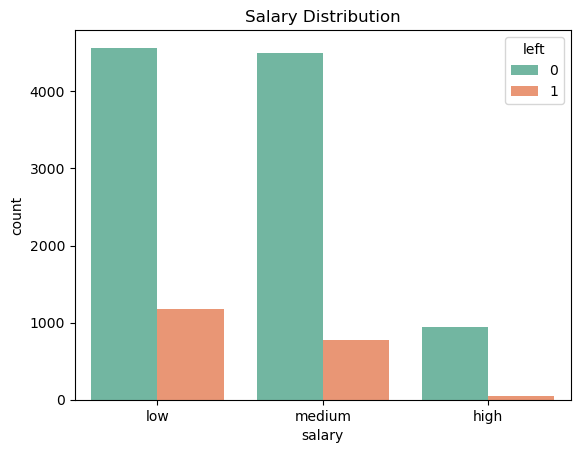

In [19]:
sns.countplot(x = 'salary' ,hue ='left' ,palette = "Set2" , data= df)
plt.title('Salary Distribution')

Majority of Employees who lef had "Low" or "Medium" salary

Text(0.5, 1.0, 'Time spent in the company')

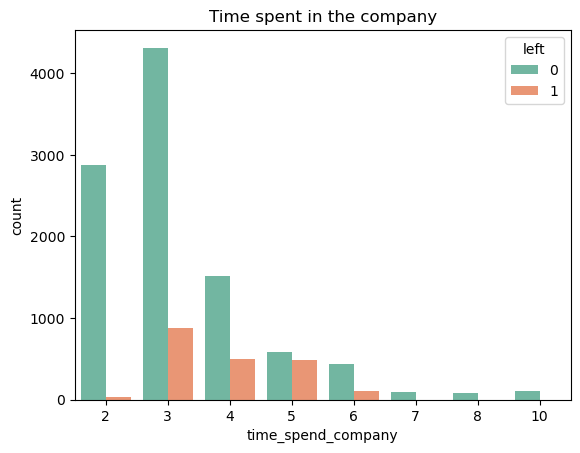

In [20]:
sns.countplot(x = 'time_spend_company' ,hue ='left' ,palette = "Set2" , data= df)
plt.title('Time spent in the company')

Text(0.5, 1.0, 'Department wise churn')

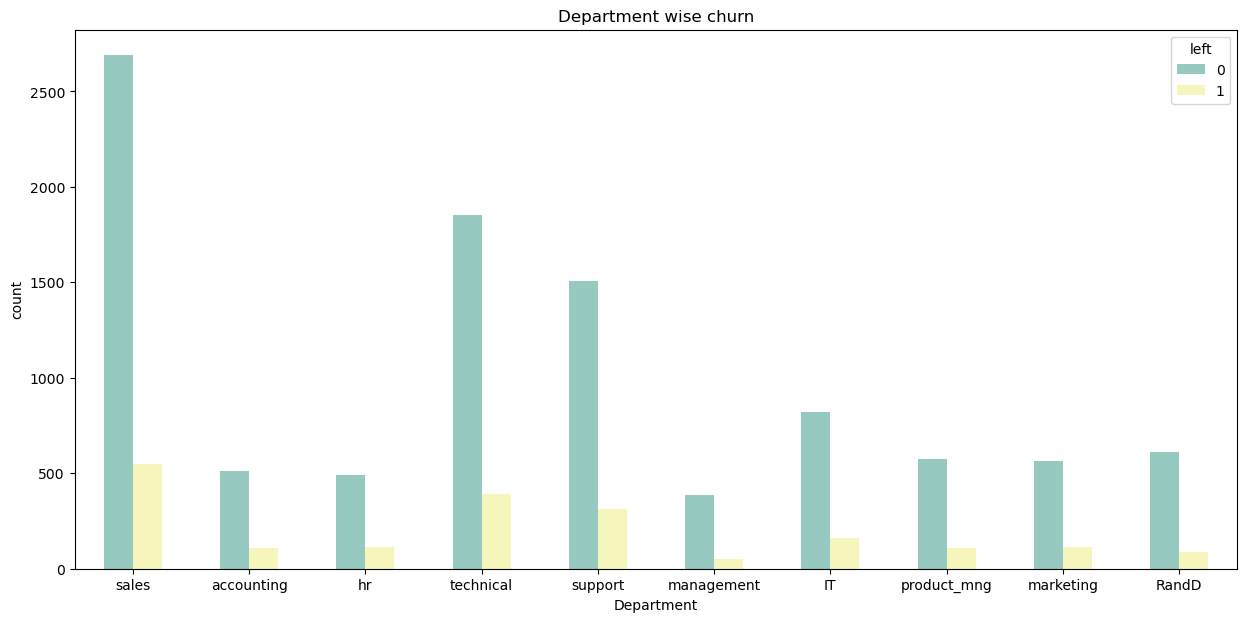

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'Department' ,hue ='left' ,palette = "Set3" , data= df, width=0.5)
plt.title('Department wise churn')

In [22]:
df.corr(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

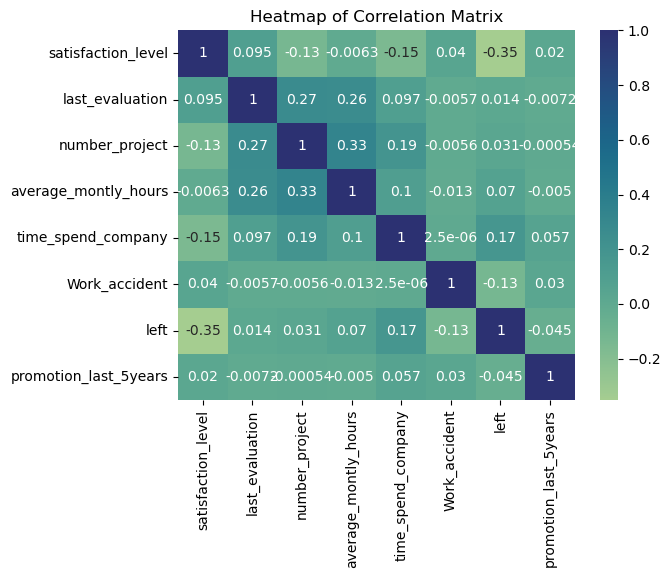

In [23]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="crest")
plt.title('Heatmap of Correlation Matrix')

In [24]:
churn = df.groupby('Department').left.agg(['sum','count']).reset_index()
churn

,Department,sum,count
0,IT,158,976
1,RandD,85,694
2,accounting,109,621
3,hr,113,601
4,management,52,436
5,marketing,112,673
6,product_mng,110,686
7,sales,550,3239
8,support,312,1821
9,technical,390,2244


<Axes: xlabel='number_project', ylabel='average_montly_hours'>

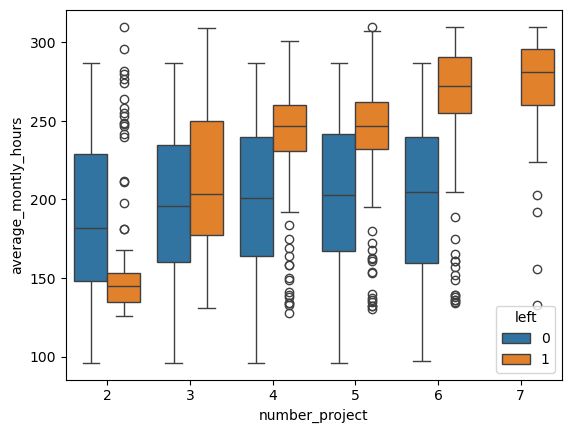

In [25]:
sns.boxplot(x="number_project", y="average_montly_hours", hue="left", data=df)

In [26]:
churn['turnover'] = 100*churn['sum']/churn['count']
churn.sort_values(['turnover'],ascending=False)

,Department,sum,count,turnover
3,hr,113,601,18.801997
2,accounting,109,621,17.552335
9,technical,390,2244,17.379679
8,support,312,1821,17.133443
7,sales,550,3239,16.980550
5,marketing,112,673,16.641902
0,IT,158,976,16.188525
6,product_mng,110,686,16.034985
1,RandD,85,694,12.247839
4,management,52,436,11.926606


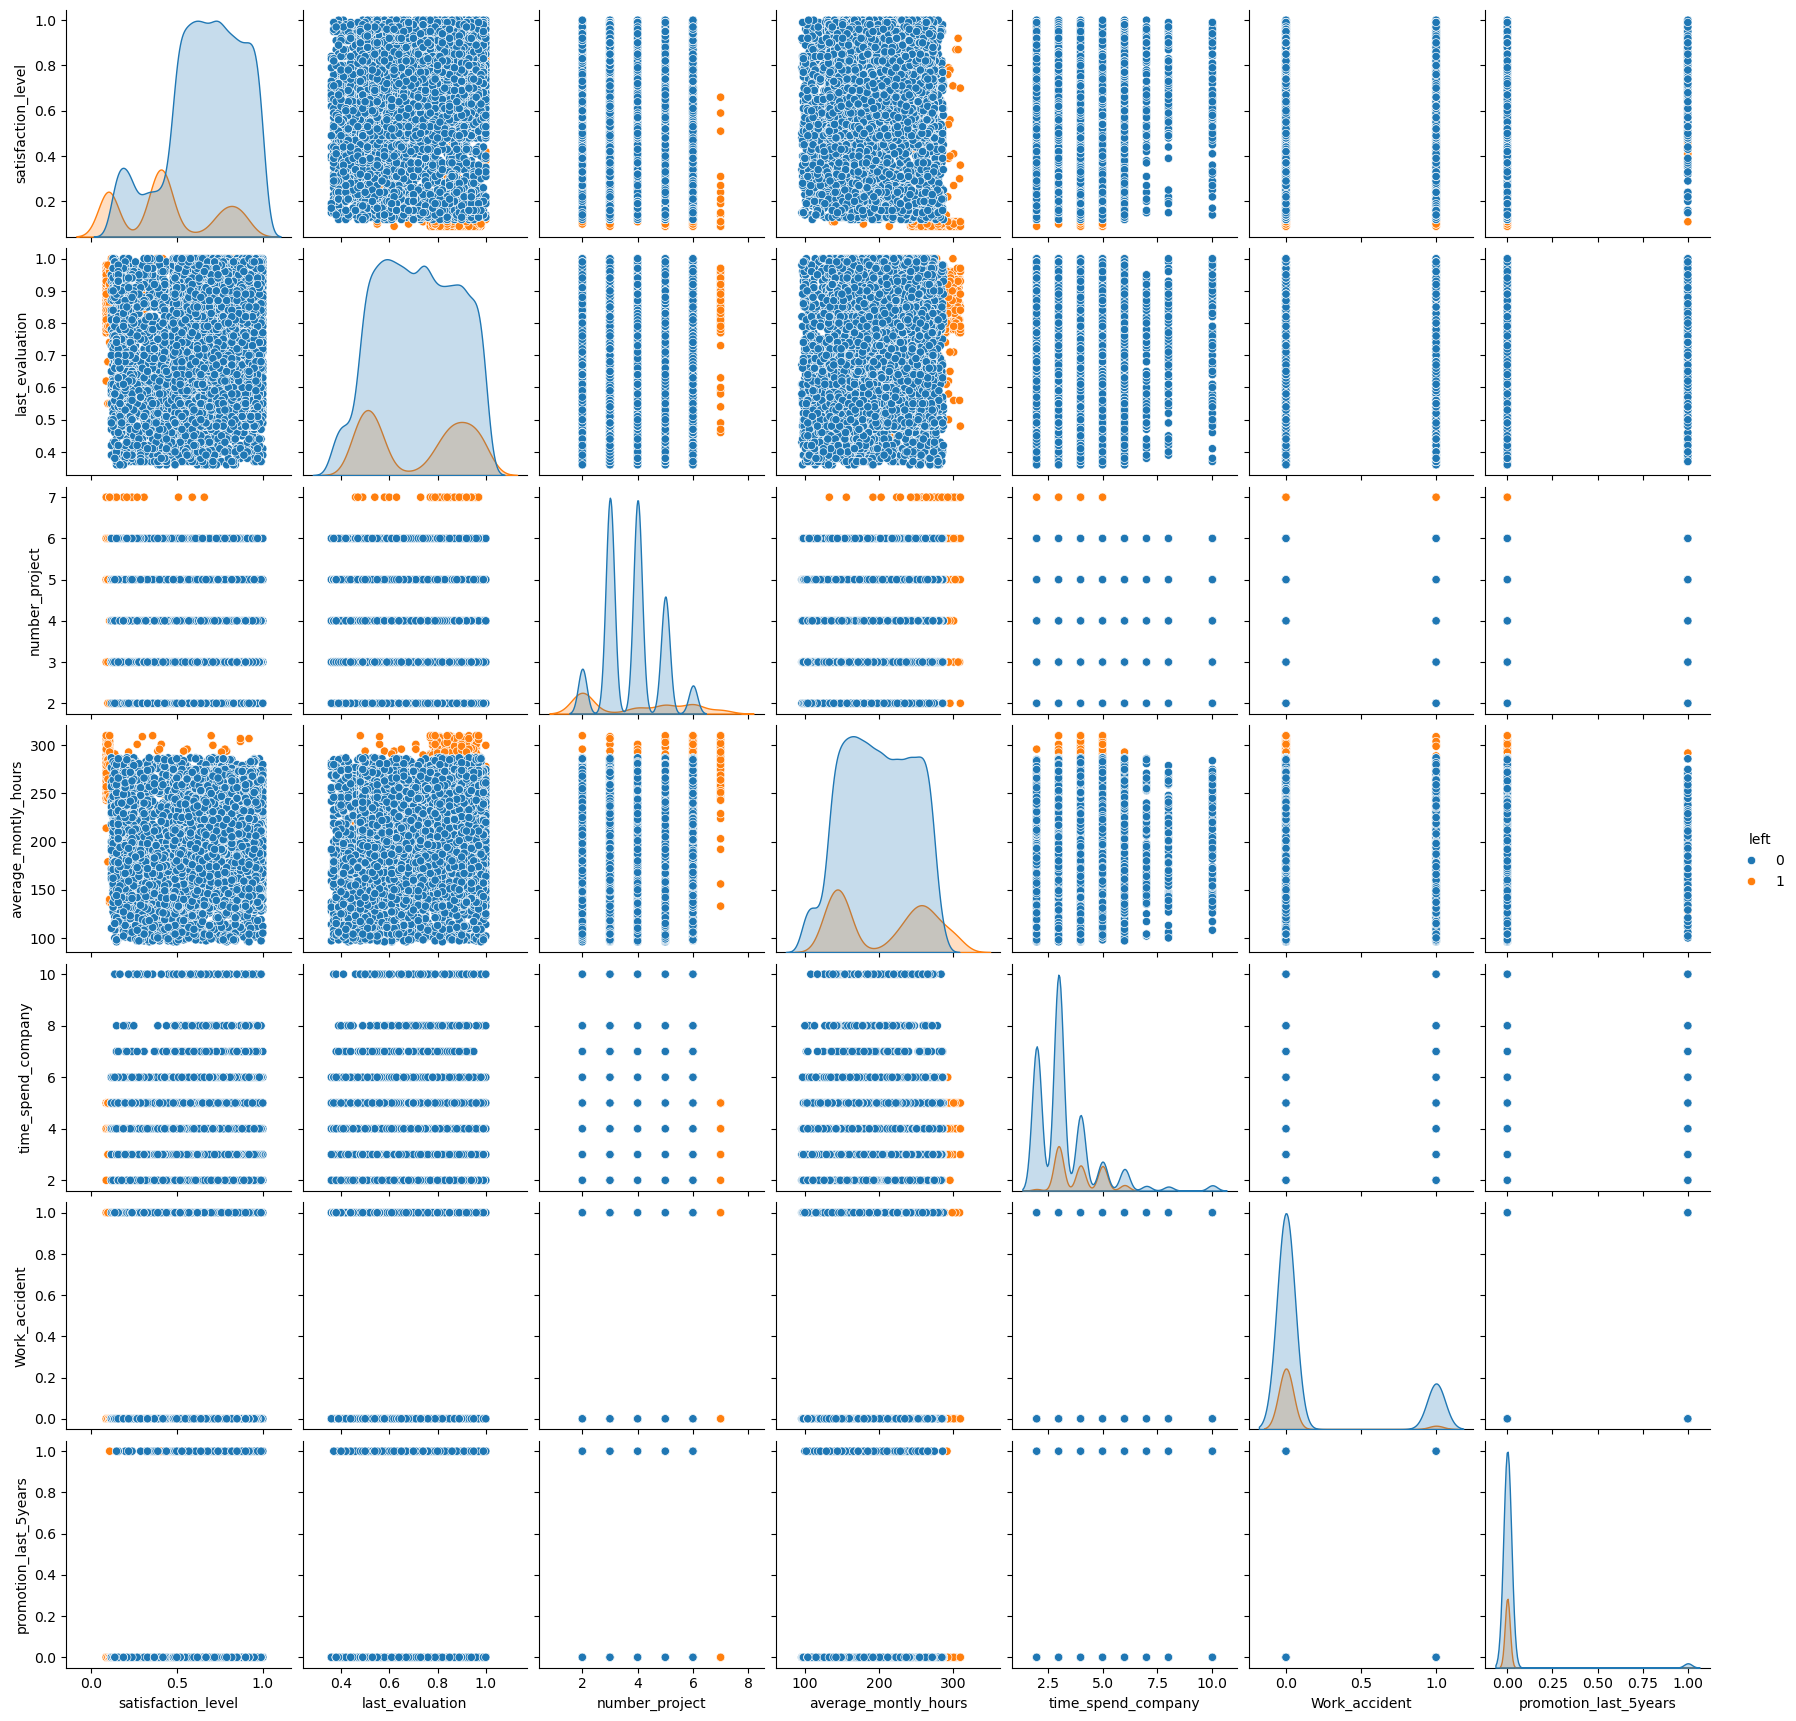

In [27]:
sns.pairplot(df, hue='left')

# Training Models

In [28]:
le=LabelEncoder()

In [29]:
df.Department=le.fit_transform(df.Department)
df.salary = le.fit_transform(df.salary)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [30]:
X=df.drop(['left'],axis=1)
y=df.left

Standardized the data build an algorithm that can perform well on unseen data

In [31]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=47)

Model training & Testing

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
models = {'Logistic_model' : LogisticRegression(),
          'Decision_model' : DecisionTreeClassifier(), 
          'Random_model' : RandomForestClassifier()
         }
accuracy, precision, recall = {}, {}, {}

for i in models.keys():
    models[i].fit(X_train, y_train)
    y_pred=models[i].predict(X_test)
    
    accuracy[i] = accuracy_score(y_test,y_pred)
    precision[i] = precision_score(y_test,y_pred)
    recall[i] = recall_score(y_test,y_pred)
    print(i,'Accuracy: ', accuracy[i])
    print(i, 'Precision: ',precision[i])
    print(i,'Recall: ', recall[i],'\n')

Logistic_model Accuracy:  0.8320133388912047
Logistic_model Precision:  0.4791666666666667
Logistic_model Recall:  0.23291139240506328 

Decision_model Accuracy:  0.9670696123384743
Decision_model Precision:  0.8969849246231156
Decision_model Recall:  0.9037974683544304 

Random_model Accuracy:  0.9833263859941642
Random_model Precision:  0.9916897506925207
Random_model Recall:  0.9063291139240506 



In [35]:
model_stats=pd.DataFrame(models.keys())
model_stats['accuracy'] = accuracy.values()
model_stats['precision'] = precision.values()
model_stats['recall'] = recall.values()
model_stats

,0,accuracy,precision,recall
0,Logistic_model,0.832013,0.479167,0.232911
1,Decision_model,0.967070,0.896985,0.903797
2,Random_model,0.983326,0.991690,0.906329


<Axes: >

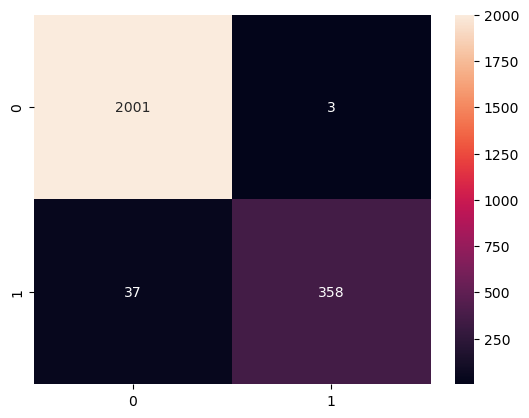

In [36]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [37]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',round((TP+TN)/float(TP+TN+FP+FN),4),'\n', '\n',
        'Sensitivity or True Positive Rate = TP/(TP+FN) = ',round(TP/float(TP+FN),4),'\n',
        'Specificity or True Negative Rate = TN/(TN+FP) = ',round(TN/float(TN+FP),4),'\n', '\n',
        'Positive Predictive value = TP/(TP+FP) = ',round(TP/float(TP+FP),4),'\n',
        'Negative predictive Value = TN/(TN+FN) = ',round(TN/float(TN+FN),4))

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9833 
 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9063 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9985 
 
 Positive Predictive value = TP/(TP+FP) =  0.9917 
 Negative predictive Value = TN/(TN+FN) =  0.9818


Conclusion:
We did some EDA, then a little data cleaning. Later we did some Data-preprocessing and then trained 3 Machine Learning algorithms. Based on the evaluation metrics, Random Forest Classifier has outperformed other models with 98 percent accuracy.